In [63]:
import pandas as pd

# Step 1: Read the data
# step 2: Choose input features : Issue and 
#                output : Product
#                        {'Debt collection','Mortgage','Credit card','Consumer loan','Bank account or service',
#                         'Payday loan','Credit reporting','Money transfers','Student loan','Prepaid card',
#                         'Other financial service'}

# Feature Extraction : Count Vectorizer and TfIDF
# Algorith : MultinomialNB

In [64]:
data = pd.read_csv("C:\MyWork\MyLearning\Career Growth\ML\Files\DataSet\Consumer Complaint.csv")

In [65]:
data.shape

(28156, 14)

In [66]:
data.head()

,Unnamed: 0,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,0,1291006,Debt collection,NaN,Communication tactics,Frequent or repeated calls,TX,76119.0,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,NaN
1,1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479.0,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,NaN
2,2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,MA,2127.0,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes
3,3,1291615,Credit card,NaN,Other,NaN,CA,92592.0,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,NaN
4,4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,NaN,43068.0,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,NaN


In [67]:
data['Product'].unique()

array(['Debt collection', 'Mortgage', 'Credit card', 'Consumer loan',
       'Bank account or service', 'Payday loan', 'Credit reporting',
       'Money transfers', 'Student loan', 'Prepaid card',
       'Other financial service'], dtype=object)

In [68]:
data['Issue']

0                           Communication tactics
1           Cont'd attempts collect debt not owed
2        Application, originator, mortgage broker
3                                           Other
4           Cont'd attempts collect debt not owed
                           ...                   
28151       Cont'd attempts collect debt not owed
28152                Taking out the loan or lease
28153    Loan servicing, payments, escrow account
28154          Can't stop charges to bank account
28155                    Other transaction issues
Name: Issue, Length: 28156, dtype: object

In [69]:
# Drop the null 

data = data.dropna(subset=['Issue'])

In [70]:
data.isnull().sum()

# There is no null values at 'Product' and 'Issue'

Unnamed: 0                  0
Complaint ID                0
Product                     0
Sub-product             10574
Issue                       0
Sub-issue               14943
State                     421
ZIP code                  280
Date received               0
Date sent to company        0
Company                     0
Company response            0
Timely response?            0
Consumer disputed?      22148
dtype: int64

In [71]:
data['category_id'] = data['Product'].factorize()[0]

category_id_df = data[['Product', 'category_id']].drop_duplicates().sort_values('category_id')

In [72]:
category_id_df

,Product,category_id
0,Debt collection,0
2,Mortgage,1
3,Credit card,2
6,Consumer loan,3
11,Bank account or service,4
13,Payday loan,5
26,Credit reporting,6
39,Money transfers,7
103,Student loan,8
730,Prepaid card,9


In [73]:
category_to_id = dict(category_id_df.values)

id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [74]:
category_to_id

{'Debt collection': 0,
 'Mortgage': 1,
 'Credit card': 2,
 'Consumer loan': 3,
 'Bank account or service': 4,
 'Payday loan': 5,
 'Credit reporting': 6,
 'Money transfers': 7,
 'Student loan': 8,
 'Prepaid card': 9,
 'Other financial service': 10}

In [75]:
id_to_category

{0: 'Debt collection',
 1: 'Mortgage',
 2: 'Credit card',
 3: 'Consumer loan',
 4: 'Bank account or service',
 5: 'Payday loan',
 6: 'Credit reporting',
 7: 'Money transfers',
 8: 'Student loan',
 9: 'Prepaid card',
 10: 'Other financial service'}

In [76]:
data.head(2)

,Unnamed: 0,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,category_id
0,0,1291006,Debt collection,NaN,Communication tactics,Frequent or repeated calls,TX,76119.0,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,NaN,0
1,1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479.0,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,NaN,0


In [79]:
data[data['Issue'].isnull()]

,Unnamed: 0,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,category_id


In [80]:
# No null Values

data[data['Product'].isnull()]

,Unnamed: 0,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,category_id


In [81]:
# Drop the null 

data = data.dropna(subset=['Issue'])

In [82]:
data.shape

(28154, 15)

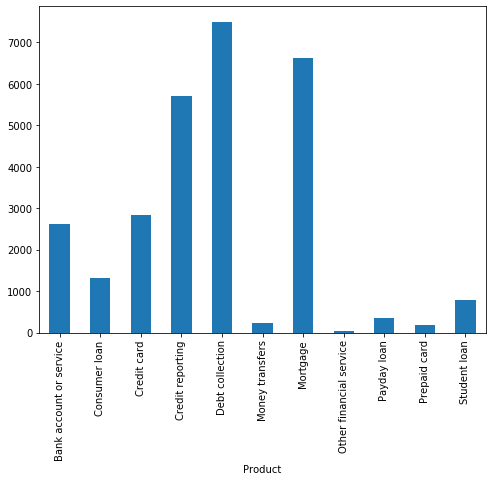

In [83]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
data.groupby('Product').Issue.count().plot.bar(ylim=0)
plt.show()

In [84]:
data['Issue'].isnull().sum()

0

In [85]:
data.Issue

0                           Communication tactics
1           Cont'd attempts collect debt not owed
2        Application, originator, mortgage broker
3                                           Other
4           Cont'd attempts collect debt not owed
                           ...                   
28151       Cont'd attempts collect debt not owed
28152                Taking out the loan or lease
28153    Loan servicing, payments, escrow account
28154          Can't stop charges to bank account
28155                    Other transaction issues
Name: Issue, Length: 28154, dtype: object

In [86]:
# Text Representation

from sklearn.feature_extraction.text import TfidfVectorizer


# sublinear_df is set to True to use a logarithmic form for frequency.

# min_df is the minimum numbers of documents a word must be present in to be kept

# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.

# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.

# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(data.Issue).toarray()

labels = data.Product

features.shape

(28154, 304)

In [87]:
# Now, each of 28154 consumer complaint narratives is represented by 304 features,
# representing the tf-idf score for different unigrams and bigrams.

# We can use sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the products

In [88]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2

for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
. decision
. deposits
  . Most correlated bigrams:
. debt protection
. wrong day
# 'Consumer loan':
  . Most correlated unigrams:
. decision
. deposits
  . Most correlated bigrams:
. debt protection
. wrong day
# 'Credit card':
  . Most correlated unigrams:
. decision
. deposits
  . Most correlated bigrams:
. debt protection
. wrong day
# 'Credit reporting':
  . Most correlated unigrams:
. decision
. deposits
  . Most correlated bigrams:
. debt protection
. wrong day
# 'Debt collection':
  . Most correlated unigrams:
. decision
. deposits
  . Most correlated bigrams:
. debt protection
. wrong day
# 'Money transfers':
  . Most correlated unigrams:
. decision
. deposits
  . Most correlated bigrams:
. debt protection
. wrong day
# 'Mortgage':
  . Most correlated unigrams:
. decision
. deposits
  . Most correlated bigrams:
. debt protection
. wrong day
# 'Other financial service':
  . Most correlated unigrams:
. decision
. deposits

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(data['Issue'], data['Product'], random_state = 0)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [92]:
X_test[2692]

'Disclosure verification of debt'

In [93]:
clf.predict(count_vect.transform([X_test[2692]]))

array(['Debt collection'], dtype='<U23')

In [94]:
y_test[2692]

'Debt collection'

In [100]:
X_test[13291]

'Settlement process and costs'

In [102]:
clf.predict(count_vect.transform([X_test[13291]]))

array(['Mortgage'], dtype='<U23')

In [103]:
y_test[13291]

'Mortgage'